<a href="https://colab.research.google.com/github/Siwenli0615/General/blob/main/Laboration2%20FactionWar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import random
import matplotlib.pyplot as plt

class Faction:


    def __init__(self,name:str,apples:int,oranges:int,bananas:int,strawberries:int):
      fruits = {"apples":apples,"oranges":oranges,"bananas":bananas,"strawberries":strawberries}
      for key,value in fruits.items():
        if not isinstance(value,int):
          raise TypeError(f'{key} needs to be a number')
        if not (0<=value<=200):
          raise ValueError(f"The limit of amount of {key} can only be between 0-200 ({value} added)")
      if not isinstance(name,str):
        raise TypeError("Name needs to be a string")

      self.__name = name
      self.__apples = apples
      self.__oranges = oranges
      self.__bananas = bananas
      self.__strawberries = strawberries

    @property
    def name(self):
      return self.__name
    @property
    def apples(self):
      return self.__apples
    @property
    def oranges(self):
      return self.__oranges
    @property
    def bananas(self):
      return self.__bananas
    @property
    def strawberries(self):
      return self.__strawberries




    def __repr__(self)->str:
      text = f"faction(name='{self.__name}',apples={self.__apples}, oranges={self.__oranges}, bananas={self.__bananas}, strawberries={self.__strawberries})"
      return text





    def inventory(self)->int:
      total_fruits = self.__apples + self.__oranges + self.__bananas + self.__strawberries
      return total_fruits




    def status(self):
      total_frukt = self.inventory()
      if total_frukt <= 150:
        print(f"This aint nothin but a scratch! {self.__name} might be struggling for the moment, but will be back with vengance! (strength:{total_frukt})")
      elif (150<total_frukt<=500):
        print(f"The proud {self.__name} is VERY eager to toss some apples! Where are the opponents?! (strength:{total_frukt})")
      elif 500<total_frukt:
        print(f"{self.__name} is GODLIKE! Their position is super dominant! (strength:{total_frukt})")



    def alter_stock_value(self,fruit:str,stock:int):
      possible_fruits = ("apples","oranges","bananas","strawberries") # skall endast acceptera mellan de 4 sorter frukter
      fruit = fruit.lower().strip()                  # ta bort risken för stora bokstav och mellanslag
      if not isinstance(fruit,str):                  # samma kontroll som initialiseringen
        raise TypeError("Fruit should be in text (string)")
      elif fruit not in possible_fruits:
        raise ValueError(f"{fruit} not found in inventory (apples/oranges/bananas/strawberries)")
      if not isinstance(stock,int):
        raise TypeError(f"The amount of {fruit} need to be a number (integer)")
      elif not (0<=stock<=200):
        raise ValueError(f"The amount of {fruit} need to be between 0-200")
      attribute_name = f'_Faction__{fruit}'
      setattr(self,attribute_name,stock)



    def visualize_resources(self):
      fruits = ['apples','oranges','bananas','strawberries']
      fruit_amounts = [self.__apples,self.__oranges,self.__bananas,self.__strawberries]


      colors = []
      max_value = 200
      for amount in fruit_amounts:
        if amount >= 100:
            colors.append('green')
        elif 50 < amount <= 100:
            colors.append('orange')
        else:
            colors.append('red')

      x_values = fruits
      y_values = fruit_amounts
      # Create an array of 200s for shadow bars
      shadow_values = [max_value] * len(fruits)
      # Create the figure and axis objects
      fig, ax = plt.subplots()
      # Plot the shadow bars with constant value 200
      ax.barh(x_values, shadow_values, color='lightgray', label='Max Amount (200)', alpha=0.5)

      # Plot the actual fruit amounts in front of the shadow bars
      bars = ax.barh(x_values, y_values, color=colors, label='Current Amount')



      plt.title(f"Resourses for faction {self.name}")
      plt.xlabel("Resourses")

      #showing the value of each fruit:
      for i, bar in enumerate(bars):
          value = y_values[i]
          ax.text(value, i, str(value), va='center')
      # Show the chart
      plt.show()



    def organical_growth(self):
      fruits = ['apples','oranges','bananas','strawberries']
      fruit_amounts = [self.__apples,self.__oranges,self.__bananas,self.__strawberries]
      for fruit,amount in zip(fruits,fruit_amounts):
        growth = random.randint(1,5)
        if amount < 200:
          new_amount = amount + growth
          if new_amount >200:
            amount = 200
            print(f"Glorious {self.name} has harvested {growth} apples, to a new total of 200! (max limit reached)")
          else:
            amount = new_amount
            print(f"Glorious {self.name} has harvested {growth} apples, to a new total of {amount}!")


        elif amount == 200:
          print(f"Glorious {self.name} is already at maximum capacity for apples!")
        self.alter_stock_value(fruit,amount)

      self.visualize_resources()


    def __mul__(self, other):
      success_rate = 70
      outcome = random.randint(1,100)
      if outcome > success_rate:





In [127]:
def victory():

    return True
  else:
    return False

victory()

False

Glorious Fire Nation has harvested 1 apples, to a new total of 200!
Glorious Fire Nation has harvested 5 apples, to a new total of 85!
Glorious Fire Nation has harvested 3 apples, to a new total of 23!
Glorious Fire Nation is already at maximum capacity for apples!


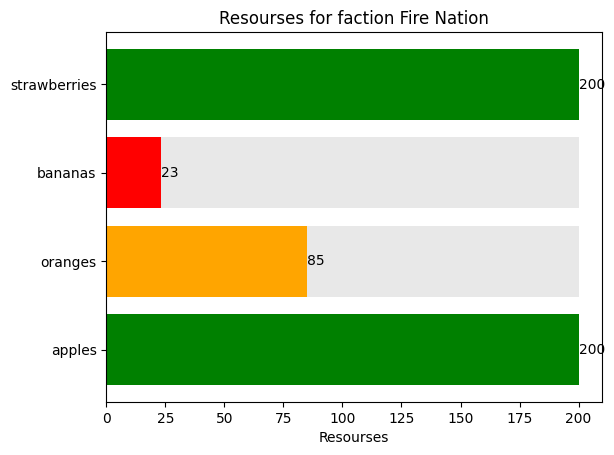

In [110]:
fire_nation = Faction('Fire Nation', 199, 80, 20, 200)
fire_nation.organical_growth()

In [95]:
fire_nation = Faction('Fire Nation', 200, 80, 20, 200)
print(fire_nation.apples)
fire_nation.alter_stock_value("apples",150)
print(fire_nation.apples)

200
150


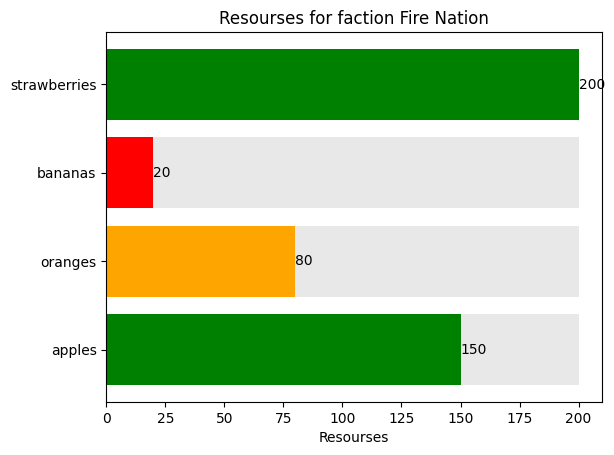

new apples: 200


In [33]:
fire_nation = Faction('Fire Nation', 150, 80, 20, 200)



fire_nation.visualize_resources()

fire_nation.alter_stock_value('apples',200)
print(f"new apples: {fire_nation.apples}")

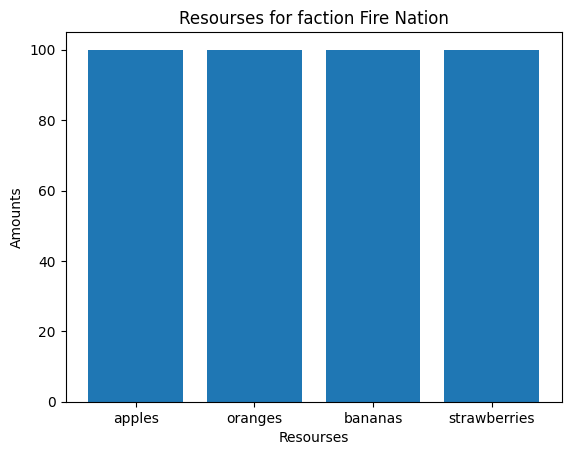

In [4]:
fire_nation = Faction('Fire Nation', 100, 100, 100, 100)
earth_kingdom = Faction('Earth Kingdom', 0, 0, 0, 0)
water_tribe = Faction('Water Tribe', 100, 100, 100, 100)
air_nomads = Faction('Air Nomads', 100, 100, 100, 100)



In [ ]:
print(fire_nation)
print(earth_kingdom)
print(water_tribe)
print(air_nomads)

faction(name='Fire Nation',apples=100, oranges=100, bananas=100, strawberries=100)
faction(name='Earth Kingdom',apples=0, oranges=0, bananas=0, strawberries=0)
faction(name='Water Tribe',apples=100, oranges=100, bananas=100, strawberries=100)
faction(name='Air Nomads',apples=100, oranges=100, bananas=100, strawberries=100)


In [ ]:
test = fire_nation.inventory()
print(test)
print(fire_nation.apples)
fire_nation.status()
earth_kingdom.status()

400
100
The proud Fire Nation is VERY eager to toss some apples! Where are the opponents?! (strength:400)
This aint nothin but a scratch! Earth Kingdom might be struggling for the moment, but will be back with vengance! (strength:0)
